
# Project: Investigate a Dataset (Medical Appointments  No Shows!)
Godwin Akpa (May, 2022)
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The No Show Appointments data piqued my interest for this project because it seems the realest to me and would enable me put theories to practice easily.
> In this project, I will be investigating and analyzing data associated with the Medical_Appointments_No_Shows data. The dataset details information from over 100k medical appointments in Brazil and is focused on the question of whether  or not patients show up for their appointment.
> The analysis  is focused on finding trends  influencing patients to show or not show up to appointments.
At the end of this section, I used the Exploratory Data Analysis approach to answer specific questions like:
How specific features (age, scholarship and sms_received) relate to the no_show for appointment.
> The data set include set of characteristics about each patient (records) such as:
> **'ScheduledDay':** Days on which the patients set up their appointments.

> **'Neighborhood':** Indicates the location of the hospital.

> **'Scholarship':** Indicates whether or not the patient is enrolled in Brazil's welfare program called 'Bolsa Familia'.

> **'No-show'**: No if the patient showed up to their appointment, and Yes if they didn't.

In [144]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, I loaded in the data, check for cleanliness, and then trimmed and cleaned the dataset for analysis. I made sure that I documented my steps carefully and justifed my cleaning decisions.

### General Properties

In [145]:
# Load data to a dataframe and print out a few lines. Perform operations to inspect data
df = pd.read_csv('noshowappointments.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [146]:
# Observation: All colums have records in them
#              There are 13 independent variables and one independent variable (No_show)

# Problem:     Some attribute names are wrongly spelt ('Hipertension', 'Handcap')
#              Not all the records are needed for analysis ('PatientId','AppointmentID')

In [147]:
# Figure out the size of the dataframe
df.shape

(110527, 14)

In [148]:
# Types and look for instances of missing or possibly errant data.
# Figure out the data info, null values and data types at a go.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [149]:
# Observation: There are no missing values (non-null).

# Problem: Columns have inappropriate data types.
#          'PatientId' = int 
#          'ScheduledDay','AppointmentDay' = datetime 
#          'No-show' = int to enable statistical operations 

In [150]:
# Identifying the columns 
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [151]:
# Observation: Some column names are mispelt, so we work to correct them as well as convert them to all 
#              small caps with "_" separator

In [152]:
#   The descriptive statistics for the dataframe
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [153]:
gener_counts = df.gender.value_counts()
gener_counts

AttributeError: 'DataFrame' object has no attribute 'gender'

## We have more females documented than the male

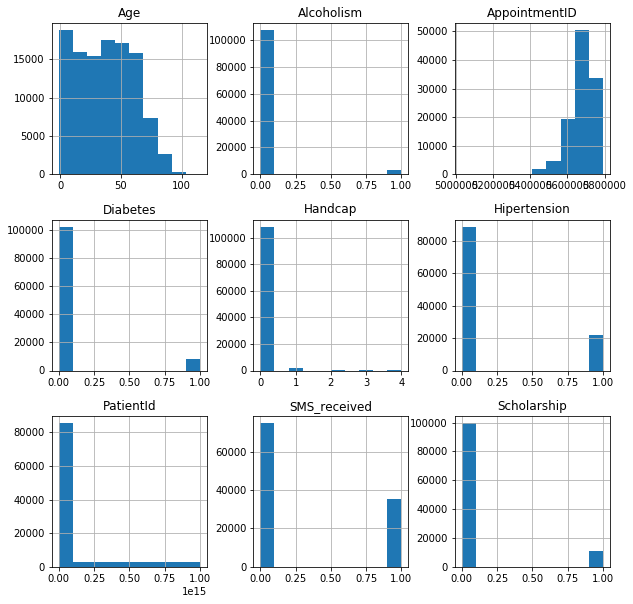

In [154]:
# Exploring the dataframe with visual
df.hist(figsize =(10,10));

### Observation: 
### Avg age of the patient is 37 years old
### The oldest patient is 115 years old
### There are not many patients who have Diabetes Alcoholism or Handcap
### There is less than half of the SMS messages recieved

In [155]:
# Figure the number of unique values in each column 
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [156]:
#Observation: There are valuable unique values for our analysis

#Problem: There are over 4 values in the Handcap column, I think its wrong. It should rather be 2 (0 & 1) 
#         as other columns.
#         Unique values for AppointmentsID exceeds PatientsId which implies that most patients have > 1 appointments 

In [157]:
# Figure out duplicate entries 
df.duplicated().sum()

0


### Data Cleaning (for the Medical Appointments No-Show data!)

In [158]:
# Correcting the typos in the column names and renaming the column names
df.columns = ['patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'scholarship', 'hypertension',
       'diabetes', 'alcoholism', 'handicap', 'sms_received', 'no_show']
df.columns

Index(['patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'scholarship',
       'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received',
       'no_show'],
      dtype='object')

In [159]:
# Review dataframe 
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [160]:
#Fixing inappropriate data types
# 'PatientId' = int 
# 'ScheduledDay','AppointmentDay' = datetime 
# 'No-show' = int
df['patient_id'] = df['patient_id'].astype(int)
df['scheduled_day'] = pd.to_datetime(df['scheduled_day'])
df['appointment_day'] = pd.to_datetime(df['appointment_day'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patient_id         110527 non-null int32
appointment_id     110527 non-null int64
gender             110527 non-null object
scheduled_day      110527 non-null datetime64[ns, UTC]
appointment_day    110527 non-null datetime64[ns, UTC]
age                110527 non-null int64
neighbourhood      110527 non-null object
scholarship        110527 non-null int64
hypertension       110527 non-null int64
diabetes           110527 non-null int64
alcoholism         110527 non-null int64
handicap           110527 non-null int64
sms_received       110527 non-null int64
no_show            110527 non-null object
dtypes: datetime64[ns, UTC](2), int32(1), int64(8), object(3)
memory usage: 11.4+ MB


In [161]:
# Coverting handicap column value to boolean
df['handicap'] = np.where(df['handicap']>0,1,0)
df.nunique()

patient_id            161
appointment_id     110527
gender                  2
scheduled_day      103549
appointment_day        27
age                   104
neighbourhood          81
scholarship             2
hypertension            2
diabetes                2
alcoholism              2
handicap                2
sms_received            2
no_show                 2
dtype: int64

In [162]:
# Changing each column value of no_show column (No = 0, Yes = 1)
df['no_show'] = df['no_show'].apply(lambda val: 0 if val == 'No' else 1)

<a id='eda'></a>
## Exploratory Data Analysis


## Research Question 1 (What is the Number of Appointments made by Each Age Class   !)

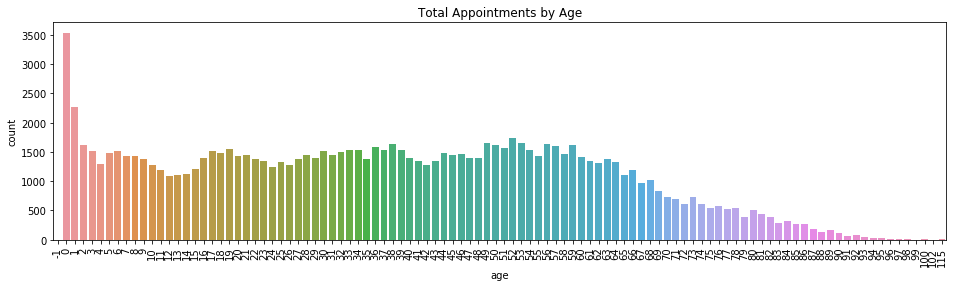

In [164]:
# Let's see how many there are patients of each age
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.countplot(x=df.age)
ax.set_title("Total Appointments by Age")
plt.show()

### Problem: There is record with value < 1, which is an error

### Fixing Error

In [165]:
# Check for record with -1 value
df[df.age < 0]

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
99832,-2147483648,5775010,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,0


In [172]:
# Drop record with -1 value
df.drop(99832, axis = 0, inplace = True)

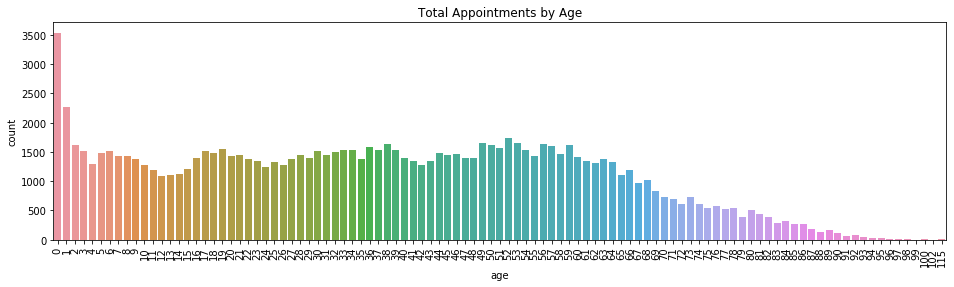

In [173]:
# Let's see how many there are patients of each age
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.countplot(x=df.age)
ax.set_title("Total Appointments by Age")
plt.show()

### Deduction: The above histogram shows a record peak for the infants (patients of age 0). For the record with higher age values, the distribution assumes some level of uniformity. After the age value of around 59 we see a right-skewed distribution.

## Research Question 2 (What is the relationship between Age and patients showing up or not for appointment  !)

In [166]:
#get the median amount of age
df.age.median()

37.0

In [167]:
# select smaples with age less than the medias 
low_age = df.query('age < 37.0')

# select smaples with age less than the medias 
high_age = df.query('age > 37.0')

num_samples = df.shape[0]
num_samples == low_age['age'].count() + high_age['age'].count()

False

In [168]:
low_age = df.query('age < 37.0')

low_age.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
3,-2147483648,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
6,-2147483648,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,1
8,-2147483648,5638447,F,2016-04-29 08:02:16+00:00,2016-04-29 00:00:00+00:00,21,ANDORINHAS,0,0,0,0,0,0,0
9,-2147483648,5629123,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,CONQUISTA,0,0,0,0,0,0,0
10,-2147483648,5630213,F,2016-04-27 14:58:11+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,0,0,0,0,0,0,0


In [169]:
high_age = df.query('age > 37.0')

high_age.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,-2147483648,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,-2147483648,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,-2147483648,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0
4,-2147483648,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0
5,-2147483648,5626772,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,0


In [170]:
#get the mean no_show rating for the low age group
low_age_mean = low_age['no_show'].mean () 
low_age_mean

0.2279788949142606

In [171]:
#get the mean no_show rating for the low age group
high_age_mean = high_age['no_show'].mean ()
high_age_mean 

0.17566623782392943

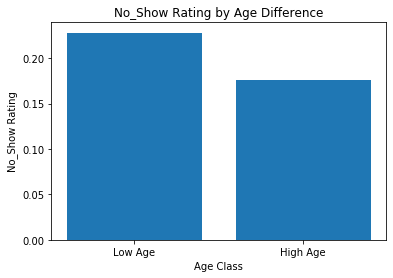

In [60]:
# Representation with bar chart
locations  = [1, 2]
heights = [low_age_mean, high_age_mean]
labels = ['Low Age', 'High Age']
plt.bar(locations, heights, tick_label=labels)
plt.title('No_Show Rating by Age Difference')
plt.xlabel('Age Class')
plt.ylabel('No_Show Rating');

### Deduction: As seen from the chart, It is more likely for patients with lower ages(compared to the median) to show up for Appointments than those with Higher ages.

## Research Question 3 (What is the relationship between  Scholarship and patients showing up or not for appointment  !)

In [61]:
# select smaples without scholarship 
no_scholarship = df.query('scholarship == 0')
no_scholarship.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,-2147483648,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,-2147483648,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,-2147483648,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,-2147483648,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,-2147483648,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0


In [62]:
# select smaples with scholarship
yes_scholarship = df.query('scholarship ==1')
yes_scholarship.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
12,-2147483648,5634718,F,2016-04-28 11:33:51+00:00,2016-04-29 00:00:00+00:00,22,NOVA PALESTINA,1,0,0,0,0,0,0
17,-2147483648,5633460,F,2016-04-28 09:28:57+00:00,2016-04-29 00:00:00+00:00,40,CONQUISTA,1,0,0,0,0,0,1
18,-2147483648,5621836,F,2016-04-26 10:54:18+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,1,0,0,0,0,1,0
31,-2147483648,5628907,M,2016-04-27 12:07:14+00:00,2016-04-29 00:00:00+00:00,12,NOVA PALESTINA,1,0,0,0,0,0,1
33,-2147483648,5616921,F,2016-04-25 15:01:04+00:00,2016-04-29 00:00:00+00:00,38,SÃO CRISTÓVÃO,1,0,0,0,0,1,0


In [63]:
# ensure these queries include each sample exactly once
num_samples = df.shape[0]
num_samples == no_scholarship['scholarship'].count() + yes_scholarship['scholarship'].count()

True

In [64]:
#get the mean no_show rating for the no_scholarship group
no_scholarship_mean  = no_scholarship['no_show'].mean () 
no_scholarship_mean

0.19807155900708365

In [65]:
#get the mean no_show rating for the yes_scholarship group
yes_scholarship_mean = yes_scholarship['no_show'].mean () 
yes_scholarship_mean

0.2373630420771568

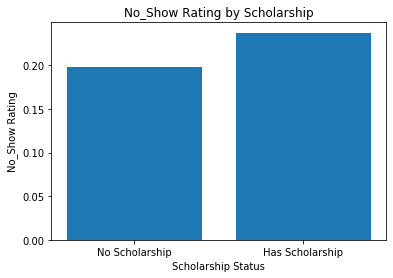

In [66]:
# Representation with bar chart
locations  = [1, 2]
heights = [no_scholarship_mean, yes_scholarship_mean]
labels = ['No Scholarship', 'Has Scholarship']
plt.bar(locations, heights, tick_label=labels)
plt.title('No_Show Rating by Scholarship')
plt.xlabel('Scholarship Status')
plt.ylabel('No_Show Rating');

### Deduction: As seen from the chart, It is certain that, patients who has scholarships showed up for Appointments more than those without any scholarship.

## Research Question 4 (What is the relationship between Receiving of sms and patients showing up or not for appointment  !)

In [67]:
# select smaples that received sms 
received_no_sms  = df.query('sms_received == 0')
received_no_sms.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,-2147483648,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,-2147483648,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,-2147483648,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,-2147483648,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,-2147483648,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0


In [68]:
# select smaples that didn't  received sms 
received_sms = df.query('sms_received ==1')
received_sms.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
11,-2147483648,5620163,M,2016-04-26 08:44:12+00:00,2016-04-29 00:00:00+00:00,29,NOVA PALESTINA,0,0,0,0,0,1,1
15,-2147483648,5620206,F,2016-04-26 08:47:27+00:00,2016-04-29 00:00:00+00:00,15,NOVA PALESTINA,0,0,0,0,0,1,0
18,-2147483648,5621836,F,2016-04-26 10:54:18+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,1,0,0,0,0,1,0
22,-2147483648,5616091,M,2016-04-25 13:29:16+00:00,2016-04-29 00:00:00+00:00,13,CONQUISTA,0,0,0,0,0,1,1
25,-2147483648,5624020,M,2016-04-26 15:04:17+00:00,2016-04-29 00:00:00+00:00,46,CONQUISTA,0,1,0,0,0,1,0


In [69]:
#get the mean no_show rating for the received_no_sms group
received_no_sms_mean = received_no_sms['no_show'].mean ()
received_no_sms_mean

0.16703311346525418

In [70]:
#get the mean no_show rating for the received_sms group
received_sms_mean = received_sms['no_show'].mean () 
received_sms_mean

0.27574544839637

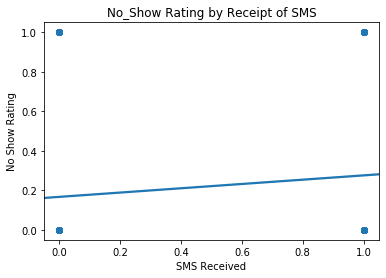

In [109]:
#Representation with a scatter plot
def scatter_plot(x,y,z):
    sns.regplot(x = df['sms_received'], y = df['no_show'])
    plt.title(z)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()
    
scatter_plot('SMS Received', 'No Show Rating', 'No_Show Rating by Receipt of SMS')

### Deduction: As seen from the chart, patients who received sms (1) showed up for Appointments more than those who did not received sms (0).

## Research Question 5 (What is the percentage of patients showing up or not showing up for appointment  !)

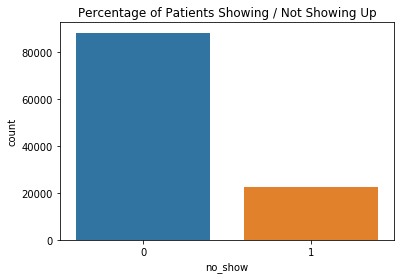

In [73]:
# Expressing the data statistically
all_appointments = df.shape[0]
missed_appointments = len(df.query('no_show == 1'))
missed_percentage  = int(round(missed_appointments/all_appointments*100))

# Entering  the chart parameters
labels = ['Received No SMS', 'Received SMS']
ax = sns.countplot(x=df.no_show, data=df, tick_label=labels)
ax.set_title("Percentage of Patients Showing / Not Showing Up")
plt.show();


### Deduction: As seen from the chart above, about 20% of patients didn't show up for their appointments, while those who showed up for their appointments make up for 80% of total patients .

##  Research Question 6: What is the gender distribution for show / no-show patients?

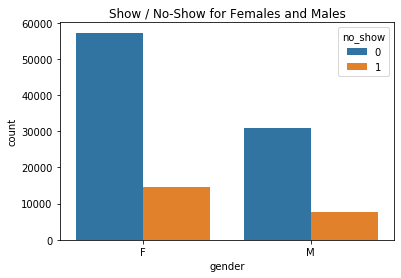

Of the 71839 appointments made by females, 14594 were missed with the ratio of 20%.
Of the 38687 appointments made by males, 7725 were missed with the ratio of 20%.


In [178]:
# Appointments by Gender
female_appointments = len(df.loc[df['gender'] == "F"])
male_appointments = len(df.loc[df['gender'] == "M"])

# Missed Appointments 
missed_appointments_female = len(df.query('no_show == 1 and gender == "F"'))
missed_appointments_male = len(df.query('no_show == 1 and gender == "M"'))

#Missed Appointment Ratio df.loc[(df['gender'] == "M") & (df['no_show'] == 1)]
missed_ratio_f = int(round(missed_appointments_female/female_appointments*100))
missed_ratio_m = int(round(missed_appointments_male/male_appointments*100))

# sns plot
ax = sns.countplot(x=df.gender, hue=df.no_show, data=df)
ax.set_title("Show / No-Show for Females and Males")
x_ticks_labels=['Female', 'Male']
plt.show();

# Deductions 
print('Of the {} appointments made by females, {} were missed with the ratio of {}%.'.format(female_appointments, missed_appointments_female, missed_ratio_f))
print('Of the {} appointments made by males, {} were missed with the ratio of {}%.'.format(male_appointments, missed_appointments_male, missed_ratio_m))

<a id='conclusions'></a>
## Conclusions

Having perused through the Medical Appointments No show database, i have succeded to solve a few problems within the dataset such as;  converting wrong data types, correcting wrong attribute names as well as changing the data value format for the dependent variable. I have also investigated most of independent variables in the dataset and made a few observations comparing them to each other as well as to the dependent one (no_show).This happens to be my first project in  this skillset and thus i was only able to perform an exploratory analysis, thus, my findings are tentative. it is imperative that the data be investigated much further with advanced statistical and analytics tools to potentially reveal new insights and correlations embedded in the dataframe.

### Observation: 
Avg age of the patient is 37 years old

The oldest patient is 115 years old

There are not many patients who have Diabetes Alcoholism or Handcap

There is less than half of the SMS messages recieved

About 20% of patients missed their appointments in each age class.

Having a scholarship has a significant inflence on patients showing up for their appointments.


### Chart Analysis:
It is more likely for patients with lower ages(compared to the median) to show up for Appointments than those with Higher ages.

It is certain that, patients who has scholarships showed up for Appointments more than those without any scholarship.

As seen from the chart, patients who receive sms showed up for Appointments more than those who did not received sms.

About 20% of patients didn't show up for their appointments, while those who showed up for their appointments make up for 80% of total patients .

### Limitations
There is a small amount of data collected from the older population

There is no information on whether the patient cancelled the appointment or skipped it

The data was only collected over a few months instead of a full year

There wasn't much information on the SMS, only if it was recieved or not

My knowledge of the use of functions is limited so i could not utilize it fully in the course of the project.


### References:
https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

https://google.github.io/styleguide/pyguide.html

https://www.editage.com/insights/what-are-limitations-in-a-study

https://www.analyticsvidhya.com/blog/2016/01/guide-data-exploration/

http://www.mymarketresearchmethods.com/wp-content/uploads/2013/01/Chart-types.jpg 

#### Dataset:
https://www.kaggle.com/joniarroba/noshowappointm
